In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import KFold
from itertools import combinations
from itertools import permutations
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#df = pd.read_csv('mnist.csv', index_col=0)
df = pd.read_csv('adulttrain.csv', names = ['Age','WorkClass','FnlWgt','Edu','EduNum','Married','Occ','Relationship','Race','Sex','CapGain','CapLoss','HrsWk','Country','Income'])
df.head()

,Age,WorkClass,FnlWgt,Edu,EduNum,Married,Occ,Relationship,Race,Sex,CapGain,CapLoss,HrsWk,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#df['IsMale'] = df['Sex'].map({'Male':1, 'Female':0})
df['SexCat'] = df.Sex.astype('category', ordered=True).cat.codes
df['RaceCat'] = df.Race.astype('category',ordered=True).cat.codes
df['WorkClassCat'] = df.WorkClass.astype('category',ordered=True).cat.codes
df['MarriedCat'] = df.Married.astype('category',ordered=True).cat.codes
df['OccCat'] = df.Occ.astype('category',ordered=True).cat.codes
df['RelCat'] = df.Relationship.astype('category',ordered=True).cat.codes
df['CountryCat'] = df.Country.astype('category',ordered=True).cat.codes
# df['HasCabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# df['IsAlone'] = df.FamilySize.apply(lambda x: 1 if x == 1 else 0)
# df['Embarked'] = df['Embarked'].fillna('S')
# df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
# df['Age'] = df['Age'].fillna(df.Age.mean())
# df['Age'] = df.Age.apply(lambda x: 0 if x < 16 else 1 if x < 32 else 2 if x < 48 else 3 if x < 64 else 4)
# df['Fare'] = df.Fare.apply(lambda x : 0 if x < 7.91 else 1 if x < 14.45 else 2 if x < 31 else 3)
df['IsMale'] = df['Sex'].map({' Male':1, ' Female':0})
df['IsWhite'] = df.Race.apply(lambda x: 1 if x == ' White' else 0)
df['IsUSA'] = df.Country.apply(lambda x: 1 if x == ' United-States' else 0)
df.head(5)

,Age,WorkClass,FnlWgt,Edu,EduNum,Married,Occ,Relationship,Race,Sex,...,SexCat,RaceCat,WorkClassCat,MarriedCat,OccCat,RelCat,CountryCat,IsMale,IsWhite,IsUSA
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,4,7,4,1,1,39,1,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,4,6,2,4,0,39,1,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,4,4,0,6,1,39,1,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,2,4,2,6,0,39,1,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,2,4,2,10,5,5,0,0,0


In [4]:
# dfcountry = df[['Country','CountryCat','IsUSA']]
# dfcountry.head(10)

,Country,CountryCat,IsUSA
0,United-States,39,1
1,United-States,39,1
2,United-States,39,1
3,United-States,39,1
4,Cuba,5,0
5,United-States,39,1
6,Jamaica,23,0
7,United-States,39,1
8,United-States,39,1
9,United-States,39,1


In [5]:
# df.Country.unique()
# df.Sex.unique()
# df.Age.hist()
# df.WorkClass.unique()
# df.WorkClassCat.hist()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [6]:
# df.Race.value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: Race, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C909EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D73F3C8>]], dtype=object)

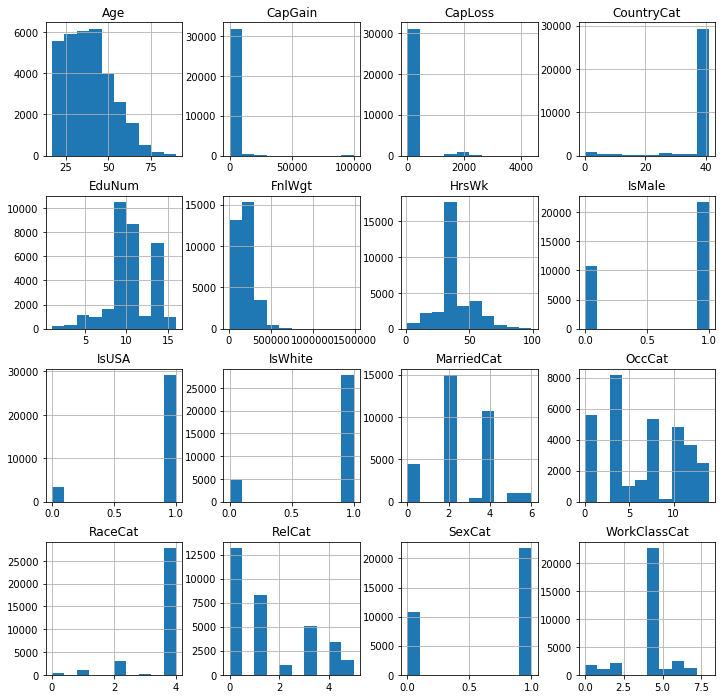

In [7]:
# df.hist(figsize=(12,12))

In [18]:
# y_train = df.Income
# X_train = df[['Age','FnlWgt','EduNum','CapGain','CapLoss','HrsWk','SexCat','RaceCat','WorkClassCat','MarriedCat','OccCat','RelCat','CountryCat']]
#X_train = df[['IsMale','IsWhite','IsUSA']]

In [28]:
y = df.Income
X = df[['Age','FnlWgt','EduNum','CapGain','CapLoss','HrsWk','SexCat','RaceCat','WorkClassCat','MarriedCat','OccCat','RelCat','CountryCat']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
model = RandomForestClassifier(n_estimators=100, max_depth=7).fit(X_train,y_train)

In [31]:
model.score(X_train, y_train)

0.85890442356176944

In [32]:
model.score(X_test, y_test)

0.85585334077796393

In [40]:
y = df.Income
X = df[['Age','FnlWgt','EduNum','CapGain','CapLoss','HrsWk','SexCat','RaceCat','WorkClassCat','MarriedCat','OccCat','RelCat','CountryCat']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
cv = KFold(n_splits=10)
ls = np.linspace(15,20,6,dtype=int)
#for depth in range(1, 20):
for i,depth in enumerate(ls):
    model = RandomForestClassifier(n_estimators=100,max_depth=depth).fit(X_train,y_train)
    train_scores, test_scores = [], []
    for train_i, test_i in cv.split(X):
        Xr, yr, Xt, yt = X.loc[train_i], y.loc[train_i], X.loc[test_i], y.loc[test_i]
        model.fit(Xr, yr)
        test_scores.append(model.score(Xt, yt))
        train_scores.append(model.score(Xr, yr))
    print('depth:', depth, 'test scores:', sum(test_scores)/len(test_scores), 'train scores:', sum(train_scores)/len(train_scores))

depth: 15 test scores: 0.865329965925 train scores: 0.908049506441
depth: 16 test scores: 0.866343592595 train scores: 0.917491612613
depth: 17 test scores: 0.866067104381 train scores: 0.92716917628
depth: 18 test scores: 0.866190001652 train scores: 0.937409786359
depth: 19 test scores: 0.865545019648 train scores: 0.946828000582
depth: 20 test scores: 0.866343479438 train scores: 0.956532866373


In [24]:
#df = pd.read_csv('mnist.csv', index_col=0)
# dft = pd.read_csv('adulttest.csv', names = ['Age','WorkClass','FnlWgt','Edu','EduNum','Married','Occ','Relationship','Race','Sex','CapGain','CapLoss','HrsWk','Country','Income'])
# dft.head()

,Age,WorkClass,FnlWgt,Edu,EduNum,Married,Occ,Relationship,Race,Sex,CapGain,CapLoss,HrsWk,Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [25]:
# dft['SexCat'] = dft.Sex.astype('category',ordered=True).cat.codes
# dft['RaceCat'] = dft.Race.astype('category',ordered=True).cat.codes
# dft['WorkClassCat'] = dft.WorkClass.astype('category',ordered=True).cat.codes
# dft['MarriedCat'] = dft.Married.astype('category',ordered=True).cat.codes
# dft['OccCat'] = dft.Occ.astype('category',ordered=True).cat.codes
# dft['RelCat'] = dft.Relationship.astype('category',ordered=True).cat.codes
# dft['CountryCat'] = dft.Country.astype('category',ordered=True).cat.codes
# dft['IsMale'] = dft['Sex'].map({' Male':1, ' Female':0})
# dft['IsWhite'] = dft.Race.apply(lambda x: 1 if x == ' White' else 0)
# dft['IsUSA'] = dft.Country.apply(lambda x: 1 if x == ' United-States' else 0)
# dft.head()

,Age,WorkClass,FnlWgt,Edu,EduNum,Married,Occ,Relationship,Race,Sex,...,SexCat,RaceCat,WorkClassCat,MarriedCat,OccCat,RelCat,CountryCat,IsMale,IsWhite,IsUSA
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,1,2,4,4,7,3,38,1,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,1,4,4,2,5,0,38,1,1,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,1,4,2,2,11,0,38,1,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,1,2,4,2,7,0,38,1,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,4,0,4,0,3,38,0,1,1


In [26]:
# y_test = dft.Income
# #X_test = dft[['Age','FnlWgt','EduNum','CapGain','CapLoss','HrsWk','SexCat','RaceCat','WorkClassCat','MarriedCat','OccCat','RelCat','CountryCat']]
# X_test = dft[['IsMale','IsWhite','IsUSA']]

In [27]:
# model.score(X_test, y_test)

0.0